![BTS](https://github.com/vfp1/bts-dsf-2020/raw/main/Logo-BTS.jpg)

# Session 2: Logistic Regression EXERCISE

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Classical Data Analysis

### Answers by Rima H.

**Resources:**
* Sklearn documentation

# Logistic Regression Assignment

We are given a dataset of  direct marketing campaigns of a credit institution. **Our goal is to implement a model to predict whether the client will subscribe to a term deposit.**

**When working on the assignment there could be multiple ways to explore data or implement specific analysis. Choose that one you retain more appropriate but always justify every choice you make (e.g., why you choose some variables), comment your code, describe the plots and results you obtain.**


### Enjoy!

DATASET DESCRIPTION

- age (numeric)
- job : type of job 
- marital : marital status
- education 
- default: has credit in default? 
- housing: has housing loan? 
- loan: has personal loan? 
- contact: contact communication type 
- month: last contact month of year 
- day_of_week: last contact day of the week 
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
- campaign: number of contacts performed during this campaign and for this client 
- pdays: number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign 
- emp.var.rate: employment variation rate 
- cons.price.idx: consumer price index 
- cons.conf.idx: consumer confidence index 
- euribor3m: euribor 3 month rate 
- nr.employed: number of employees 
- y — Target variable: has the client subscribed a term deposit? 

##### Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=18)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data = pd.read_csv('https://github.com/RimaHinn/bts-cda-2020/raw/main/Session_2/banking.csv')
data.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1


In [3]:
data.shape

(41188, 21)

## EDA and Feature Engineering 

An important requirement for Logistic Regression to function properly is Feature Engineering as it helps to identify independent variables. Without proper identification of independent variables Logistic Regression fails to perform correctly.

One disadvantage of logistic regression is that it doesn’t handle large number of categorical variables well.

```education``` column has many categories, try to reduce the categories for a better modelling. The education column has the following categories.


In [4]:
data.education.unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

We will group all ```basic.XX``` in a unique value ```basic```

In [5]:
# Put your code here

# replacing basic.XX with basic
data['education']= data['education'].replace({'basic.4y': 'basic', 'basic.9y': 'basic', 'basic.6y': 'basic' })


In [6]:
#now testing the code to see that we have 6 categories  
#The different basic categrories are now part of one category
data.education.unique()

array(['basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

##### Analyse the distribution of the target variable

<AxesSubplot:xlabel='y', ylabel='count'>

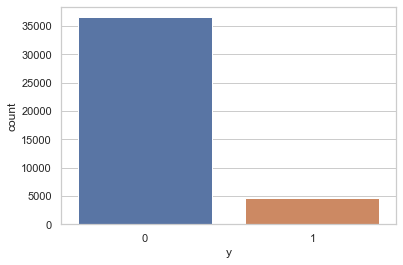

In [7]:
sns.countplot(x='y', data=data, )


In [8]:
#create the y_counts variable
y_counts= data['y'].value_counts()
y_counts

0    36548
1     4640
Name: y, dtype: int64

In [9]:
#create the y_precent variable
y_percent= data['y'].value_counts()/data.shape[0]*100
y_percent

0    88.734583
1    11.265417
Name: y, dtype: float64

In [117]:
#put everything together and create dataframe and display it
df1 = {'y':data.y.unique(), 
       'count': y_counts,
       'perc':y_percent.round(2),
        } 

df1 = pd.DataFrame(df1) 

df1

,y,count,perc
0,0,36548,88.73
1,1,4640,11.27


##### What can we observe about the distribution of the target variable

## Observations:
- Target variable is very high for the "1" value
- It looks like there is large unbalance between "0" and "1"

##### Observe how the different numeric variables behave for the 2 classes

In [11]:
#Create DataFrame grouped by y and get the mean of each value
df2= data.groupby(by="y", axis=0).mean()
df2

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


## Observations:
- Based on the above data, it looks like age is definitely not  a factor (since age is almost the same for both outcomes)
- 'Duration' seems to be the value with the most difference. This could possibly be the main factor influencing the 'y' outcome
- The rest of the data also looks almost similar for both outcomes

##### Analyse other variables - Make some plots and discuss them

- **Job title**

Text(0, 0.5, 'Frequency of Purchase')

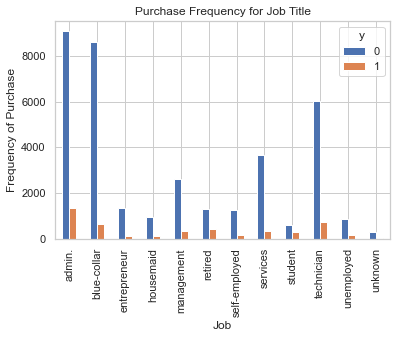

In [12]:
job_df = pd.crosstab(data.job, data.y)
job_df.plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency of Purchase')

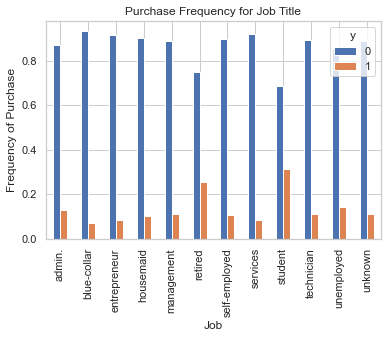

In [13]:
job_df = pd.crosstab(data.job, data.y)
job_df.div(job_df.sum(1).astype(float), axis=0).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

## Observations:
- It seems like the frequency of purchase is low in every job type. 
- It does not look like having a particular job type increases the frequency of purchase
- When we look at the Percentage it seems like the highest percentage of purchase is first by students and then by retirees
- It is best to make observations based on percentages instead of actual numbers

- **Marital status**

Text(0, 0.5, 'Proportion of Customers')

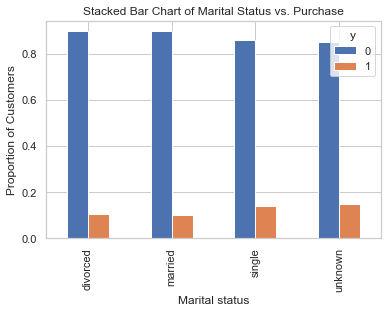

In [14]:
marital_df = pd.crosstab(data.marital, data.y)
marital_df.div(marital_df.sum(1).astype(float), axis=0).plot(kind='bar')
plt.title('Stacked Bar Chart of Marital Status vs. Purchase')
plt.xlabel('Marital status')
plt.ylabel('Proportion of Customers')

## Observations: 
- It does not look like marital status makes a large difference
- It seems like "single" status might have a very small influence 

- **Education**

Text(0, 0.5, 'Proportion of Customers')

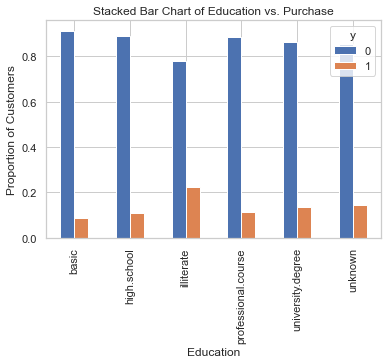

In [15]:
edu_df = pd.crosstab(data.education, data.y)
edu_df.div(edu_df.sum(1).astype(float), axis=0).plot(kind='bar')
plt.title('Stacked Bar Chart of Education vs. Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

## Observations: 
- It looks like being "Illiterate" is the highest categeory of purchases
- Interesting that right after "illiterate" the next highest category is "university degree". However, it tooks like there is no large difference between most values (besides illiterate)

- **Day of Week**

Text(0, 0.5, 'Frequency of Purchase')

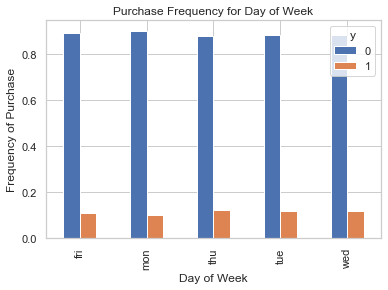

In [16]:
day_df = pd.crosstab(data.day_of_week, data.y)
day_df.div(day_df.sum(1).astype(float), axis=0).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')

## Observations: 
- It does not look like there is a large difference between the days of week
- It seems like Thursday is slightly highest among other days
- It seems like Monday is slightly lower among other days

- **Month**

Text(0, 0.5, 'Frequency of Purchase')

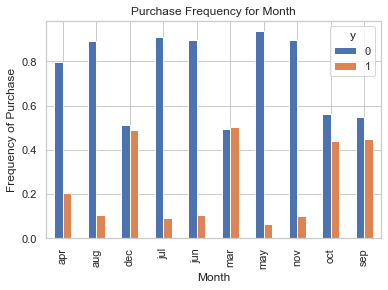

In [17]:
month_df = pd.crosstab(data.month, data.y)
month_df.div(month_df.sum(1).astype(float), axis=0).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')

## Observations:
- It seems like the Month definitely influences the Frequency of purchase
- March and December seem to have the highest purchases followed by September and October
- May seems to be the month with the lowest percentage of purchases

- **poutcome**

Text(0, 0.5, 'Frequency of Purchase')

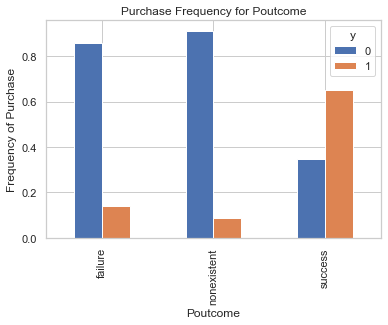

In [18]:
P_df = pd.crosstab(data.poutcome, data.y)
P_df.div(P_df.sum(1).astype(float), axis=0).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')

## Observations:
- "poutcome" is the outcome of the previous marketing campaign
- It looks like there is a high purchase rate when the poutcome = 'success'

### Create dummy variables

In [19]:

d_df = pd.get_dummies(data, columns=['poutcome'], drop_first=True)
d_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,poutcome_nonexistent,poutcome_success
0,44,blue-collar,married,basic,unknown,yes,no,cellular,aug,thu,...,999,0,1.4,93.444,-36.1,4.963,5228.1,0,1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,1,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,6,2,-1.7,94.055,-39.8,0.729,4991.6,1,0,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,1,0
4,55,retired,married,basic,no,yes,no,cellular,aug,fri,...,3,1,-2.9,92.201,-31.4,0.869,5076.2,1,0,1


In [20]:

d_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   41188 non-null  int64  
 1   job                   41188 non-null  object 
 2   marital               41188 non-null  object 
 3   education             41188 non-null  object 
 4   default               41188 non-null  object 
 5   housing               41188 non-null  object 
 6   loan                  41188 non-null  object 
 7   contact               41188 non-null  object 
 8   month                 41188 non-null  object 
 9   day_of_week           41188 non-null  object 
 10  duration              41188 non-null  int64  
 11  campaign              41188 non-null  int64  
 12  pdays                 41188 non-null  int64  
 13  previous              41188 non-null  int64  
 14  emp_var_rate          41188 non-null  float64
 15  cons_price_idx     

### Implement the Logistic Regression Model

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


##### Prepare the dataset for training

In [102]:

#set of features
X = d_df[['duration', 'poutcome_success', 'poutcome_nonexistent']] 

#target variable
y = d_df['y'] 


In [81]:
#Train the model with 70% of the samples and test with 30% of the samples and random_state=0
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [82]:
print("Training Data:", X_train.shape, y_train.shape)

Training Data: (28831, 3) (28831,)


In [83]:
print("Test Data:", X_test.shape, y_test.shape)

Test Data: (12357, 3) (12357,)


In [84]:
# Create an instance of the model 

#using logistic  regression 
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

In [85]:
#Fit the model
logistic_model.fit(X_train,y_train)

LogisticRegression()

##### Compute predictions and accuracy using the accuracy score provided by the sklearn library

In [86]:
y_pred = logistic_model.predict(X_test)


In [87]:
from sklearn.metrics import accuracy_score

In [88]:
accuracy_score(y_test, y_pred)

0.9094440398154892

In [89]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.91


##### An accuracy of **91%** looks quite a good result, but have a look more in detail observing the confusion matrix and other metrics you consider interesting.


##### EXPLAIN WHY ACCURACY IS NOT ENOUGH TO EVALUATE THE PERFORMANCE OF A CLASSIFIER AND WHY IT MIGHT FAIL IN CASE OF IMBALANCED DATASET



## Observations: 
- The accuracy score is quite high but we should not conclude that the model will perform well only based on its accuracy score. 
- The accuracy is useful if we have the same amount of samples per class. If we have an imbalanced set of samples. accuracy isn't useful. A test can have a high accuracy but perform worse than a test with a lower accuracy.



The confusion matrics gives an interesting overview of how well a model is doing and it is a great starting point for any classification model evaluation.

![](https://skappal7.files.wordpress.com/2018/08/confusion-matrix.jpg?w=748)

In [90]:

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred)
cm

array([[10762,   219],
       [  900,   476]])

In [94]:
cm=confusion_matrix(y_test, y_pred,normalize = 'true')
cm

array([[0.98005646, 0.01994354],
       [0.65406977, 0.34593023]])

<AxesSubplot:>

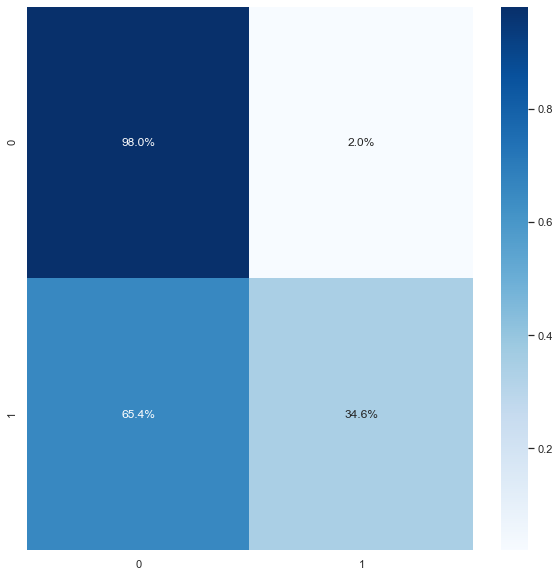

In [95]:
plt.figure(figsize=(10,10)) 
sns.heatmap(cm,cmap="Blues", annot=True, fmt='.1%')

**Is our model obtaining good results or is it failing in some specific case?**

### Confusion Matrix Explanation
- A confusion matrix is a specific table layout that allows visualization of the performance of an algorithm.
- Each row in the matrix represents the instances in a predicted class
- Each column in the matrix represents the instances in an actual class

### Confusion matrix for this excerice
Based on the exercise above:
- We have 90% True Positives and 2% False Postives
- We have 65.4% False Negatives and 34.6% True Negatives. 

### Observations
- The model seems to be doing well with Positive results
- It does not seem to be doing well with Negative Results
- Based on the numbers above, it does not seem like the model is obtaining good results. 




##### Compute other metrics using classification report

In [96]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10981
           1       0.68      0.35      0.46      1376

    accuracy                           0.91     12357
   macro avg       0.80      0.66      0.71     12357
weighted avg       0.90      0.91      0.90     12357



#### Remember:
    
**Precision:** percentage of your results which are relevant. Among all the elements that your model classify as positive, how many are really positive examples?

$\frac{TP}{TP+FP}$
                                            

**Recall:** percentage of total relevant results correctly classified by your algorithm.

$\frac{TP}{TP+FN}$                                            

In [97]:
565/(565+263) #Precision@1

0.6823671497584541

In [98]:
565/(811+565) #Recall@1

0.4106104651162791

## Imbalanced Classes

Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally.


##### Explain why imbalanced data can be a problem 

### Observations
- Imbalanced classification happens when there is an unequal distribution of classes in the training dataset.
- When we have severely imbalanced classes, we can get high overall accuracy (like we did with the 91% accuracy score ) but that accuracy score does not generate good insights. 
- The overall accuracy might be high, but for the minority class we will have very low recall.
- In the case of this excercise, when trying to decide if the client will subscribe to a term deposit, we will wind up predicting that someone is not interested. As a result we will not take the appropriate actions to get that person's interest in signing up


##### SMOTE

During the exploratory data analysis we have seen that we have **Imbalanced Classes**, i.e.,the percentage of negative examples is much higher with respect to the percentage of positiv examples. Indeed, observing the confusion matrix we saw that the implmented model face some problem in predict the positive examples (if a client will subscribe a term deposit).


To face this problem we will apply an over-sampling technique trying to balance our dataset generating **Synthetic Samples:** it consists in creating new synthetic points from the minority class to increase its cardinality.

we will use the **SMOTE** Algorithm [see here for more details](https://arxiv.org/pdf/1106.1813.pdf).

In order to apply SMOTE **install the imblearn python library** (if you already have it you do not need to reinstall):

[Follow this instructions](https://imbalanced-learn.readthedocs.io/en/stable/install.html)


### Now implement again the model following all the steps

Prepare the data

In [99]:
#X = d_df.loc[:, d_df.columns != 'y']
#y = d_df.loc[:, d_df.columns == 'y']

In [105]:
#set of features
X = d_df[['duration', 'poutcome_success', 'poutcome_nonexistent']] 

#target variable
y = d_df['y'] 

In [104]:
X.shape

(41188, 3)

In [106]:
y.shape

(41188,)

##### Apply SMOTE to generate synthetic data

In [107]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

# Create training and test set - test size:30% random_state=0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

columns = X_train.columns


In [56]:
# Apply oversampling ONLY ON training data


In [109]:
os_data_X,os_data_y=os.fit_resample(X_train,y_train)

In [110]:
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

In [111]:
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  51134
Number of no subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


**Notice that we over-sampled only on the training data**

##### Check if the classes in the dataset now are balanced

In [134]:
# Put your code here
#create the y_counts variable
y_count= os_data_y.value_counts()
y_count

y
1    25567
0    25567
dtype: int64

In [116]:
#create the y_precent variable
y_perc= os_data_y.value_counts()/ os_data_y.shape[0]*100
y_perc

y
1    50.0
0    50.0
dtype: float64

In [141]:
#put everything together and create dataframe and display it
df2 = { 
       'count': y_count,
       'perc':y_perc.round(2),
       
        } 

df2 = pd.DataFrame(df2) 

df2

,count,perc
y,,
1,25567,50.0
0,25567,50.0


They are prefectly distributed!!

##### Implement the model

In [146]:
# Prepare thedata qith the oversampled dataset
X = os_data_X# Put your code here
y = os_data_y # Put your code here

# Create training and test
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.30, random_state=0)


# Create an instance of the logistic regression model
logreg =  LogisticRegression()

#Fit the model
logreg.fit(X_train,y_train)

/Users/rimahinnawi/opt/anaconda3/envs/MLProject/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

#### Model Evaluation: evaluate the model and compare with previous implmentation/evaluation

In [147]:
#Compute predictions
y_pred = logreg.predict(X_test)# Put your code here

# score returns the mean accuracy on the given test data and labels.
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


The total accuracy decreases. Is our model obtaining poorer results? Have a deeper look analysing confusion matrix and classification report

In [148]:
# Confusion Matrix

cm2=confusion_matrix(y_test, y_pred)
cm2

array([[6327, 1339],
       [2018, 5657]])

In [150]:
cm2=confusion_matrix(y_test, y_pred,normalize = 'true')
cm2

array([[0.82533264, 0.17466736],
       [0.2629316 , 0.7370684 ]])

<AxesSubplot:>

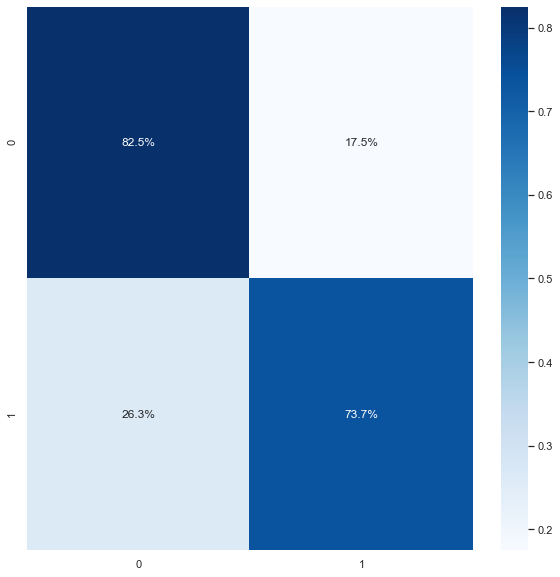

In [151]:
plt.figure(figsize=(10,10)) 
sns.heatmap(cm2,cmap="Blues", annot=True, fmt='.1%')

### Observations: 

- True Positive is 82.5%
- True Negative is 73.7%
- False Negative is 26.3%
- False Positive is 17.5


Analysing the confusion matriix we can observe that now our model is able to predict quite weel both positive and negative examples!! Let's see if this is also confirmed looking at precision and recall

In [152]:
#classification_report


print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.83      0.79      7666
           1       0.81      0.74      0.77      7675

    accuracy                           0.78     15341
   macro avg       0.78      0.78      0.78     15341
weighted avg       0.78      0.78      0.78     15341



The support is the number of occurrences of each class in y_test.



##### Discuss the obtained results!

### Observations: 



The result after applying SMOTE is a lot better. Even thought the general accuracy score dropped, the model is a better model now based on the info in the confustion matrix and the recall score has increased tremendously. This makes the model a lot better